<a href="https://colab.research.google.com/github/alexanderknave/dotfiles/blob/master/intuitions_on_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intuition on Convolutions

**Objectives**
- Compute convolution operations
- Visualize a convolution kernel
- VIsualize the effect of a convolution on images

<hr>
<hr>

**Convolutional Neural Networks** correspond the Neural Networks that are specially designed to work on images. 

This is made possible thanks to _convolutions_. This specific mathematical operations applies a _kernel_ to an input image and creates an output representation. The name of this output can change depending on the community. Here, let's talk about the output as it corresponds to the output of a layer, as in standard DL neurons. But it can also be "convoluted representation/feature", "convolution", or also "activation" as it corresponds to the activation of a given layer.

<img src="convolution.png" width="300">

⚠️ It is important to get that the same kernel, i.e. the same weights, are applied to different zones of the images. This is very different from standard DL operations where each weight of each neuron is related to only one input coordinate (which in this case would be each pixel). Here, the weight of a kernel is not applied to only one input, i.e. one pixel, but to different pixels, "step by step".

You can think of each kernel (or each filter in case of color image) as a magnifying glass through which you see the image. Similarly to your eyes which have to do not capture everything at once, but that have to look at different parts before to capture the whole thing you are looking at.

So let's see a bit deeper at convolutions in general, and their impact in Convolutional Neural Networks.

## Data

❓ First use the following function to load the data. 

⚠️ Restrict any desire to change the shapes or types of the outputs, this can arm further questions.

In [2]:
import os
import numpy as np

from matplotlib.pyplot import imread

import matplotlib.pyplot as plt
%matplotlib inline

def load_data(path):
    nb_circles = 100
    nb_triangles = 100
    
    X, y = [], []
    
    for i in range(nb_circles):
        c_path = os.path.join(path, 'circles', f'circle_{i}.png')
        X.append(imread(c_path)[:, :, :1])
        y.append(0)
    
    for i in range(nb_triangles):
        t_path = os.path.join(path, 'triangles', f'triangle_{i}.png')
        X.append(imread(t_path)[:, :, :1])
        y.append(1)
        
    c = list(zip(X, y))
    np.random.shuffle(c)
    X, y = zip(*c)
        
    return np.array(X), np.array(y)
        
X, y = load_data('https://wagon-public-datasets.s3.amazonaws.com/deep-learning-circles-triangles')
# Replace data by "" if you are on a server

❓ Check the shape of your data. Especially, why an additional dimension of size 1 for `X`? 

<details>
    <summary>Hints</summary>

The last dimension corresponds to the grey (black & white) channel - contrary to RGB images that 
have 3 channels, one for each color
</details>

In [7]:
X.shape

(200, 76, 78, 1)

In [20]:
y.shape

(200,)

❓ Do the input images need some normalization?

In [ ]:
# YOUR CODE HERE

❓ Display some images with `plt.imshow` and their respective label (the images are black and white, therefore use `cmap=gray` in the dedicated matplotlib function - otherwise, you will get unrelevant and weird colors).

TypeError: ignored

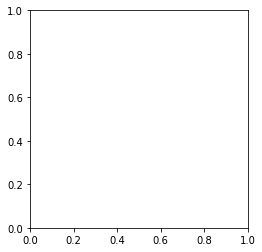

In [125]:
color_map = plt.imshow(X[0], cmap='gray')

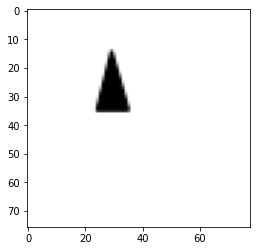

In [44]:
color_map = plt.imshow(X[0][:,:,0], cmap='gray')

❓ How many classes to predict are there? It should already give you an information on the last layer of your CNN.

In [45]:
Firstone = X[0][:,:,0]

# Part 1. Kernels

The following function allows to apply a kernel to an image => a convolution. 

⚠️ Be careful though as _convolution_ operation are slighlty different in signal processing. For instance, the numpy.convolve function does not compute the convolution in the Deep Learning sense.

⚠️ Keras convolutions are a bit more complex as they deal with padding and slide. This is a simplified example.

⚠️ Be careful: convolution sometimes refers to _one_ operation. Sometimes to the operations repeated on the entire image.

❓ Load the function and go through the lines to understand what it is doing.

In [46]:
def compute_convolution(img, kernel):
    # Parameters
    kernel = np.array(kernel)
    kernel_height, kernel_width = kernel.shape

    img = np.squeeze(img) # Removes dimensions of size 1
    img_height, img_width = img.shape
    
    array = []

    for x in range(img_height-kernel_height):
        arr = []
        
        for y in range(img_width - kernel_width):
            
            a = np.multiply(img[x:x+kernel_height, y:y+kernel_width], kernel)
            arr.append(a.sum())
            
        array.append(arr)
        
    return array

❓ Apply the convolution with the following kernel to any image from the input dataset. Display the input and output image to see the difference

In [47]:
identity_kernel = [
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
]

In [48]:
Firstone_convultion = compute_convolution(Firstone,identity_kernel)

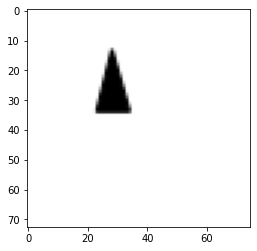

In [49]:
color_map_2 = plt.imshow(Firstone_convultion, cmap='gray')

The previous kernel corresponds to the _identity_ kernel, meaning that the output is equal to the output... It basically does nothing. You can easily figure this out by thinking about the operation it does on the image : only one pixel per convolution operation is kept as the other are multiplied by 0.

❓ `plot_convolution` with the following `kernel_1`, once on an triangle and once on a circle.

In [ ]:
for 

In [56]:
kernel_1 = [
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
]

def plot_convolution(img, kernel, activation=False):
    ''' The following printing function ease the visualization'''
    
    img = np.squeeze(img)
    output_img = compute_convolution(img, kernel)
    if activation:
        output_img = np.maximum(output_img, 0)
    
    plt.figure(figsize=(10, 5))
    
    ax1 = plt.subplot2grid((3,3),(0,0), rowspan=3)
    ax1.imshow(img, cmap='gray')
    ax1.title.set_text('Input image')
    
    ax2 = plt.subplot2grid((3,3),(1, 1))
    ax2.imshow(kernel, cmap='gray')
    ax2.title.set_text('Kernel')    
    
    ax3 = plt.subplot2grid((3,3),(0, 2), rowspan=3)
    ax3.imshow(output_img, cmap='gray')
    ax3.title.set_text('Output image')    

    for ax in [ax1, ax2, ax3]:
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)

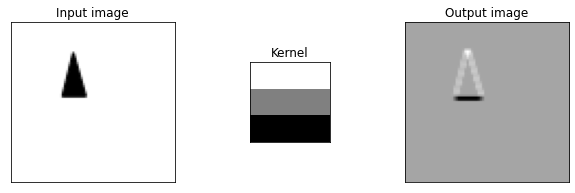

In [57]:
plot_convolution(Firstone, kernel_1, activation=False)

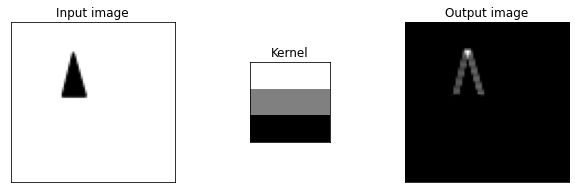

In [58]:
plot_convolution(Firstone, kernel_1, activation=True)

❓ Let's try to understand why this is meaningful. First, white colors correspond to high values and black to low values. In a neural network, just after a regular neuron or a convolution, there is an activation function. When the activation function is a `relu`, it just correponds to setting the negative values to 0.

Well, let's see what it means in the case of a CNN. Re-run the previous functions with `activation` set to `True` (in this case, the activation fuction _is_ the relu).

In [52]:
# YOUR CODE HERE

❓ This kernel is actually highlithing the edges in a given direction. Try the next following kernels to check the different edges it can detect.

In [59]:
kernel_2 = [
    [-1, -1, -1],
    [0, 0, 0],   
    [1, 1, 1],
]

kernel_3 = [
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
]

kernel_4 = [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]

# YOUR CODE HERE

In [61]:
kernel_list = [kernel_2, kernel_3, kernel_4]

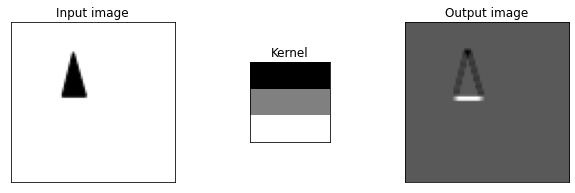

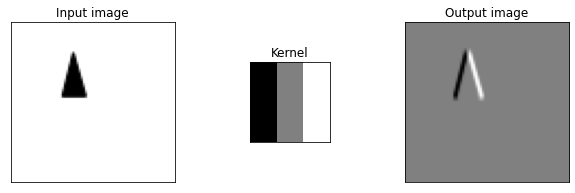

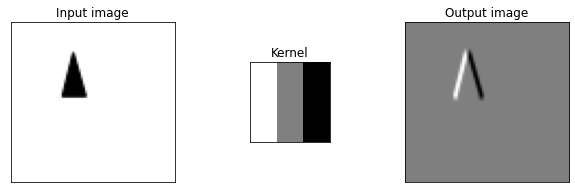

In [62]:
for a in kernel_list:
  plot_convolution(Firstone, a, activation=False)

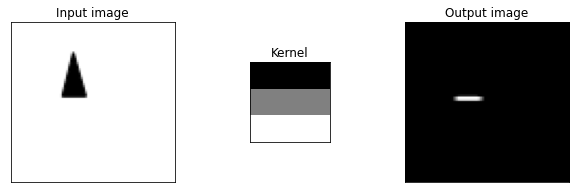

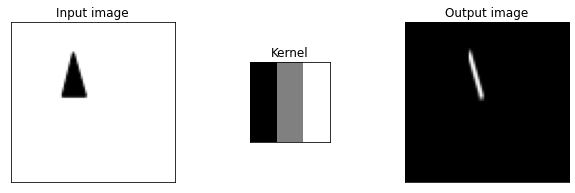

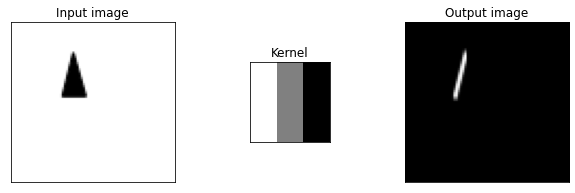

In [63]:
for a in kernel_list:
  plot_convolution(Firstone, a, activation=True)

❓ What the effect of kernel size? Check it out with a larger kernel of shape (10,10) below

In [64]:
kernel_big = np.array([
    np.ones((10,)),
    np.ones((10,)),
    np.ones((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.ones((10,))*-1,
    np.ones((10,))*-1,
    np.ones((10,))*-1,
])
pass  # YOUR CODE HERE

❓ Feel free to try any other kernel

In [65]:
random_kernel = np.random.uniform(-10, 10, (5, 5))
pass  # YOUR CODE HERE

In [66]:
kernel_list_2 = [kernel_big, random_kernel]

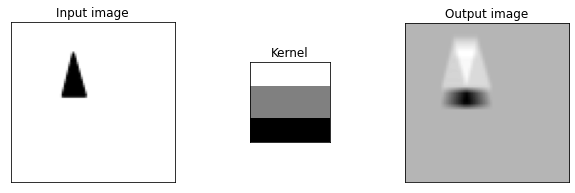

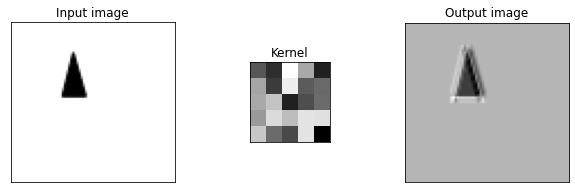

In [67]:
for a in kernel_list_2:
  plot_convolution(Firstone, a, activation=False)

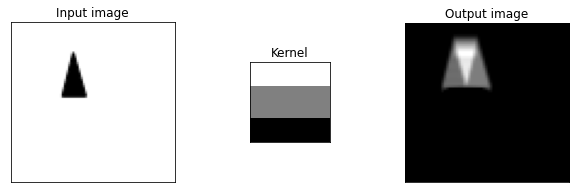

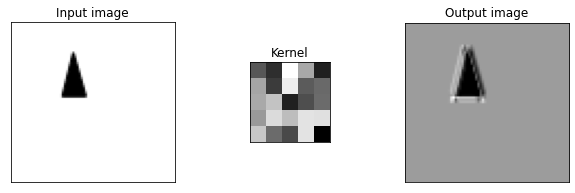

In [68]:
for a in kernel_list_2:
  plot_convolution(Firstone, a, activation=True)

Now that you got the idea of what the convolution is doing, let's see how it goes in a real Convolutional Neural Network.

# Part 2. Convolutional Neural Network


❓ Write a convolutional network that has 
- a convolutional layer with 16 filters with (4, 4) kernels.
- a convolutional layer with 32 filters with (3, 3) kernels.
- a convolutional layer with 32 filters with (3, 3) kernels.
- a convolutional layer with 32 filters with (2, 2) kernels.

with:
- A max-pooling layer (with (2, 2) pool sizes) after each convolution.
- A Dense layer of the size of your choice - be reasonable - after the flattening and before the last layer


Also, be sure to compile your model with the adequate parameters

In [69]:
import pandas as pd
import math
import statistics
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers
from tensorflow.keras import models


In [1]:
X[2,:]

NameError: ignored

In [163]:

def initialize_model():
   
    model = models.Sequential()
   
    model.add(layers.Conv2D(16, input_shape=X[2,:].shape, kernel_size=(4, 4)))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
   
    model.add(layers.Conv2D(32, kernel_size=(3, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
   
    model.add(layers.Conv2D(32, kernel_size=(3, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
   
    model.add(layers.Conv2D(32, kernel_size=(2, 2)))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
   
    model.add(layers.Flatten())

    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [191]:
model = initialize_model()

In [192]:
model

In [181]:
model.summary();

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 73, 75, 16)        272       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 36, 37, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 34, 35, 32)        4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 17, 17, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 15, 15, 32)        9248      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 7, 7, 32)       

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [183]:
y_train.shape

(134,)

In [184]:
X_train.shape

(134, 76, 78, 1)

In [193]:
model.fit(X_train, y_train, batch_size=32, verbose=1, epochs=50)

Epoch 1/50
5/5 [==============================] - 1s 110ms/step - loss: 0.7018 - accuracy: 0.5149
Epoch 2/50
5/5 [==============================] - 1s 108ms/step - loss: 0.6525 - accuracy: 0.6119
Epoch 3/50
5/5 [==============================] - 1s 109ms/step - loss: 0.6085 - accuracy: 0.6866
Epoch 4/50
5/5 [==============================] - 1s 111ms/step - loss: 0.5814 - accuracy: 0.6716
Epoch 5/50
5/5 [==============================] - 1s 106ms/step - loss: 0.5690 - accuracy: 0.6791
Epoch 6/50
5/5 [==============================] - 1s 109ms/step - loss: 0.5233 - accuracy: 0.7090
Epoch 7/50
5/5 [==============================] - 1s 105ms/step - loss: 0.5062 - accuracy: 0.7537
Epoch 8/50
5/5 [==============================] - 1s 99ms/step - loss: 0.4427 - accuracy: 0.7985
Epoch 9/50
5/5 [==============================] - 1s 100ms/step - loss: 0.4759 - accuracy: 0.7463
Epoch 10/50
5/5 [==============================] - 1s 98ms/step - loss: 0.4230 - accuracy: 0.7836
Epoch 11/50
5/5 [====

In [194]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 73, 75, 16)        272       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 36, 37, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 34, 35, 32)        4640      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 17, 17, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 15, 15, 32)        9248      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 7, 7, 32)       

❓ Fit the model. You should achieve a accuracy of at least 90. Here, the point is not to bother with overfitting, so do not worry much as you would have to if you have a high score. 

In [195]:
model.evaluate(X_test, y_test, verbose=0)

[0.15048763155937195, 0.9545454382896423]

## 2.1 Kernels

It is possible to retrieve the values of the different kernels in the CNN. Look at the following method that will return the value of a kernel depending on:
- the layer number, which can be only `0 `or `2`, as the convolution layers correspond to the first and third layer of the CNN
- the filter number, where there is 32 filters in the first convolution, and 64 filters in the second convolution
- the channel number, where there is 1 channel in the first convolution, and 32 channels in the second convolution


❓  Using `plot_convolution(activation=True)`, display some kernels from the FIRST convolutional layer, along with the activation output, to see what the model has learnt

In [202]:
def get_kernel(layer_number, filter_number, channel_number):

    weight_or_bias = 0
    k = model.layers[layer_number].weights[0].numpy()[:,
                                                      :,
                                                      channel_number,
                                                      filter_number]

    return k




In [207]:
print(get_kernel(2, 31, 15))

[[ 0.0591805   0.12131664 -0.08833859]
 [ 0.08661468 -0.03533322  0.1142259 ]
 [-0.05468439 -0.08931465  0.02879777]]


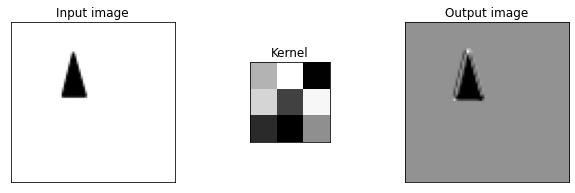

In [206]:
plot_convolution(Firstone, get_kernel(2, 31, 15), activation=True)

## 2.2 Activations

So far, we have only looked at the activation ("output image") of the **first** layer.

In order to visualize the activation of the CNN after the second convolution, we need to compute the activations after the first layer, then compute the MaxPooling, then second convolution activation, etc...

We give you below a function below which does exactly that: It computes the different activation through the entire network, and store them in an list. Notice that it uses keras `Fonctional API`

❓ Run the following cell. The function allows to directly print the activation after any layer

In [209]:
# List all 9 layers
layer_outputs = [layer.output for layer in model.layers]

# Instanciate 9 sub-models: [layer1, layer1-->layer2, layer1-->layer2-->layer3, ...]
# Reusing already trained weights and biases
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Compute the 9 output of each sub-models
activations = activation_model.predict(X) 

def get_activation(activations, image_number, layer_number, filter_number):
    '''return activation map for a given layer, image, and filter number'''
    return activations[layer_number][image_number][:, :, filter_number]

In [210]:
layer_outputs

[<KerasTensor: shape=(None, 73, 75, 16) dtype=float32 (created by layer 'conv2d_37')>,
 <KerasTensor: shape=(None, 36, 37, 16) dtype=float32 (created by layer 'max_pooling2d_35')>,
 <KerasTensor: shape=(None, 34, 35, 32) dtype=float32 (created by layer 'conv2d_38')>,
 <KerasTensor: shape=(None, 17, 17, 32) dtype=float32 (created by layer 'max_pooling2d_36')>,
 <KerasTensor: shape=(None, 15, 15, 32) dtype=float32 (created by layer 'conv2d_39')>,
 <KerasTensor: shape=(None, 7, 7, 32) dtype=float32 (created by layer 'max_pooling2d_37')>,
 <KerasTensor: shape=(None, 6, 6, 32) dtype=float32 (created by layer 'conv2d_40')>,
 <KerasTensor: shape=(None, 3, 3, 32) dtype=float32 (created by layer 'max_pooling2d_38')>,
 <KerasTensor: shape=(None, 288) dtype=float32 (created by layer 'flatten_8')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_16')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dropout_7')>,
 <KerasTensor: shape=(None, 1) dtype=float32 

❓ Choose one image, and display the 3 activation "images" of each 3 convolution layers. Pick for instance the first filter of each layer. 
- Notice how the information of an image **flows** within the network.
- You should see picture become more and more "abstract", of smaller and smaller "dimensions"

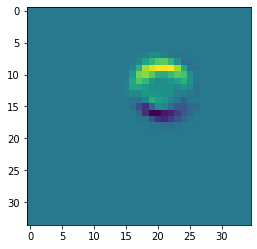

In [216]:
plt.imshow(get_activation(activations, 1, 2, 2))

In [211]:
layer_outputs[0]

<KerasTensor: shape=(None, 73, 75, 16) dtype=float32 (created by layer 'conv2d_37')>

🏁 **Congratulation! Don't forget to commit and push your notebook** 

### Utils (appendix)

The following simply presents the functions that created the dataset you are working with.

They were left at the end of the notebook in case you want to further prototype and get better understanding of what is going on. But do not prototype yet => you can go to the next exercise as for now, and come back to it any time later.

In [217]:
def draw_triangle():
    dx = np.random.uniform(0.1, 0.3)
    dy = np.random.uniform(0.1, 0.3)
    noise_x = np.random.uniform(0.0, 0.1)
    noise_y = np.random.uniform(0.0, 0.1)    
    
    x = np.random.uniform(0, 1-dx-noise_x)
    y = np.random.uniform(0, 1-dy)
    X = np.array([[x,y], [x+dx+noise_x,y], [x+dx/2, y+dy+noise_y]])

    t1 = plt.Polygon(X, color='black')
    plt.gca().add_patch(t1)
    
def draw_circle():
    r = np.random.uniform(0.1, 0.25)
    x = np.random.uniform(0+r, 1-r)
    y = np.random.uniform(0+r, 1-r)

    circle1 = plt.Circle((x, y), r, color='black')
    plt.gcf().gca().add_artist(circle1)
    
def create_image(form, path):
    plt.figure(figsize=(1, 1))
    if form == 'circle':
        draw_circle()
    elif form == 'triangle':
        draw_triangle()
    plt.axis('off')
    plt.savefig(path, dpi=80, bbox_inches='tight')
    plt.close()

    
def create_images(path):
    nb_circles = 100
    nb_triangles = 100
    
    for i in range(nb_circles):
        c_path = os.path.join(path, 'circles', f'circle_{i}.png')
        create_image('circle', c_path)
        
    for i in range(nb_triangles):
        t_path = os.path.join(path, 'triangles', f'triangle_{i}.png')
        create_image('triangle', t_path)